# Word Embeddings

## 📌 Índice
- [Introdução](#introducao)
- [Por que usar Word Embeddings?](#por-que-usar)
- [Word2Vec com Gensim](#word2vec)
  - [CBOW e Skip-gram](#cbow-skipgram)
  - [Treinando um modelo Word2Vec](#treinar-word2vec)
  - [Explorando palavras semelhantes](#palavras-semelhantes)
- [GloVe: Global Vectors for Word Representation](#glove)
- [Visualização dos Vetores](#visualizacao)
- [Comparando Similaridades](#similaridade)
- [Conclusão](#conclusao)


## 🧠 Introdução <a name="introducao"></a>

O processamento de linguagem natural (PLN) depende fortemente de como representamos as palavras para que os algoritmos possam compreendê-las. Representações baseadas em contagem, como Bag of Words ou TF-IDF, ignoram o contexto e a semântica.

Os **word embeddings** representam palavras como vetores densos e contínuos em um espaço vetorial, onde a posição relativa entre os vetores carrega informações semânticas — permitindo que palavras com significados semelhantes fiquem próximas umas das outras.

Modelos populares para gerar esses vetores incluem:
- Word2Vec (CBOW e Skip-gram)
- GloVe (Global Vectors)
- FastText (não será abordado aqui, mas pode ser explorado depois)


## 🤔 Por que usar Word Embeddings? <a name="por-que-usar"></a>

As principais motivações para o uso de embeddings são:

- Representação densa: os vetores são compactos e capturam melhor a semântica.
- Redução de dimensionalidade em relação a BoW/TF-IDF.
- Capacidade de capturar similaridade semântica (ex: "rei" - "homem" + "mulher" ≈ "rainha").
- Melhor performance em tarefas de NLP, como classificação, tradução e geração de texto.


### 📄 Texto base para treinamento

In [1]:
texto = """
Processamento de linguagem natural (PLN) é um subcampo da inteligência artificial e da linguística computacional que estuda as interações entre computadores e a linguagem humana natural. 
O objetivo do PLN é possibilitar que os computadores compreendam, interpretem e gerem linguagem de forma significativa. 
Aplicações comuns de PLN incluem tradução automática, análise de sentimentos, chatbots, reconhecimento de voz e resumo automático. 
Técnicas modernas de PLN usam aprendizado de máquina, especialmente modelos baseados em redes neurais e grandes quantidades de dados textuais.
"""

### Imports

In [13]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Baixar componentes

In [5]:
nltk.download("punkt")

# Tokenização
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(texto.lower())

# O Word2Vec espera uma lista de listas de palavras (frases ou sentenças)
dataset = [tokens]

[nltk_data] Downloading package punkt to C:\Users\Jorge
[nltk_data]     Maques/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Treinando o modelo Word2Vec

In [6]:
modelo = Word2Vec(sentences=dataset, vector_size=50, window=5, min_count=1, sg=0)  # sg=0 => CBOW

# Palavras no vocabulário
print("Vocabulário do modelo:", modelo.wv.index_to_key)

Vocabulário do modelo: ['de', ',', 'e', 'pln', 'linguagem', 'que', 'computadores', 'é', 'da', 'natural.', 'a', 'humana', 'objetivo', 'o', 'interações', 'do', 'possibilitar', 'os', 'entre', 'computacional', 'as', 'estuda', 'textuais', 'linguística', 'artificial', 'inteligência', 'subcampo', 'um', ')', '(', 'natural', 'compreendam', '.', 'interpretem', 'técnicas', 'dados', 'quantidades', 'grandes', 'neurais', 'redes', 'em', 'baseados', 'modelos', 'especialmente', 'máquina', 'aprendizado', 'usam', 'modernas', 'automático.', 'gerem', 'resumo', 'voz', 'reconhecimento', 'chatbots', 'sentimentos', 'análise', 'automática', 'tradução', 'incluem', 'comuns', 'aplicações', 'significativa.', 'forma', 'processamento']


## CBOW e Skip-gram <a name="cbow-skipgram"></a>

O Word2Vec possui duas arquiteturas principais para aprender os vetores das palavras:

- **CBOW (Continuous Bag of Words)**: prevê a palavra central a partir do contexto (palavras vizinhas). Funciona como um "preenchimento de lacunas".
- **Skip-gram**: prevê o contexto a partir da palavra central. É mais eficaz para conjuntos de dados menores e palavras raras.

No nosso exemplo, usamos CBOW (`sg=0`). Para usar Skip-gram, configuramos `sg=1` no treinamento do modelo.


### Escolher uma palavra na lista

In [11]:
print("Vocabulário do modelo:", modelo.wv.index_to_key)

Vocabulário do modelo: ['de', ',', 'e', 'pln', 'linguagem', 'que', 'computadores', 'é', 'da', 'natural.', 'a', 'humana', 'objetivo', 'o', 'interações', 'do', 'possibilitar', 'os', 'entre', 'computacional', 'as', 'estuda', 'textuais', 'linguística', 'artificial', 'inteligência', 'subcampo', 'um', ')', '(', 'natural', 'compreendam', '.', 'interpretem', 'técnicas', 'dados', 'quantidades', 'grandes', 'neurais', 'redes', 'em', 'baseados', 'modelos', 'especialmente', 'máquina', 'aprendizado', 'usam', 'modernas', 'automático.', 'gerem', 'resumo', 'voz', 'reconhecimento', 'chatbots', 'sentimentos', 'análise', 'automática', 'tradução', 'incluem', 'comuns', 'aplicações', 'significativa.', 'forma', 'processamento']


In [12]:
# Palavras semelhantes a 'linguagem'
print("Palavras semelhantes a 'linguagem':")
for palavra, similaridade in modelo.wv.most_similar("linguagem", topn=5):
    print(f"{palavra}: {similaridade:.4f}")

Palavras semelhantes a 'linguagem':
significativa.: 0.2429
incluem: 0.2381
voz: 0.2017
em: 0.1942
resumo: 0.1688


### Treinando modelo Word2Vec - Skip-gram

Além do modelo CBOW (Continuous Bag of Words), o Word2Vec também oferece o modelo Skip-gram. Enquanto o CBOW prevê a palavra central com base no contexto, o Skip-gram faz o contrário: tenta prever o contexto com base na palavra central.

Vamos treinar o modelo Skip-gram com os mesmos dados e comparar os resultados.


In [14]:
# Treinando modelo Skip-gram (sg=1)
modelo_skipgram = Word2Vec(sentences=dataset, vector_size=50, window=5, min_count=1, sg=1, workers=1)

print("\nPalavras semelhantes a 'linguagem' no modelo Skip-gram:")
for palavra, similaridade in modelo_skipgram.wv.most_similar("linguagem", topn=5):
    print(f"{palavra}: {similaridade:.4f}")


Palavras semelhantes a 'linguagem' no modelo Skip-gram:
significativa.: 0.2478
incluem: 0.2447
voz: 0.2125
em: 0.1977
e: 0.1736


### Visualização dos Word Embeddings com PCA

Para entender melhor a estrutura dos vetores aprendidos, podemos reduzir a dimensionalidade dos embeddings (de 50 para 2 dimensões) usando PCA (Análise de Componentes Principais) e visualizar a distribuição das palavras em um gráfico 2D.

Essa visualização ajuda a identificar agrupamentos semânticos no espaço vetorial.


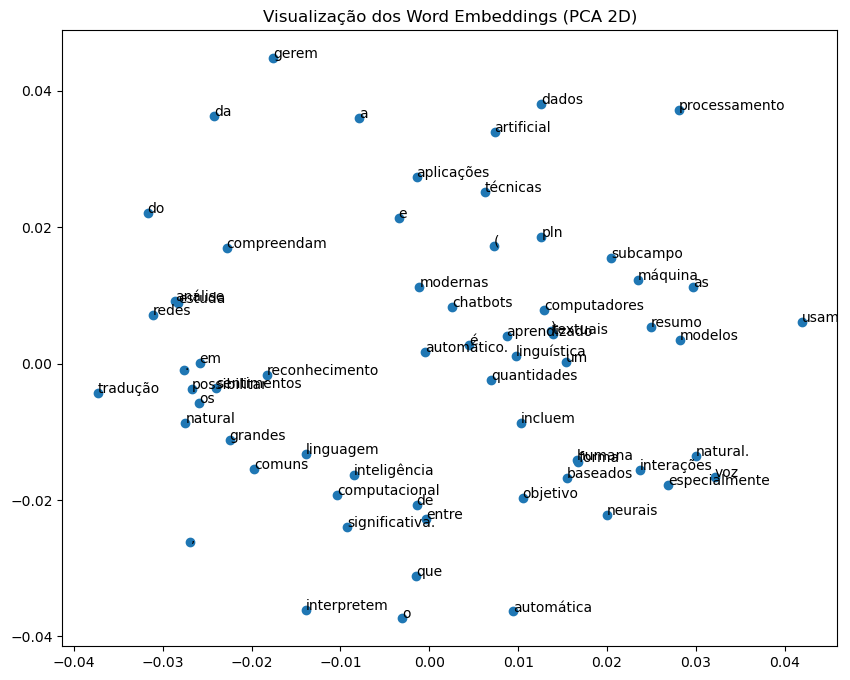

In [15]:
# Extraindo vetores e palavras do vocabulário
palavras = modelo.wv.index_to_key
vetores = modelo.wv[palavras]

# Reduzindo dimensionalidade para 2D
pca = PCA(n_components=2)
vetores_2d = pca.fit_transform(vetores)

# Plotando
plt.figure(figsize=(10, 8))
plt.scatter(vetores_2d[:, 0], vetores_2d[:, 1])

for i, palavra in enumerate(palavras):
    plt.annotate(palavra, xy=(vetores_2d[i, 0], vetores_2d[i, 1]))

plt.title("Visualização dos Word Embeddings (PCA 2D)")
plt.show()

### Teste de Analogias

Uma das capacidades interessantes dos modelos Word2Vec é a habilidade de realizar operações semânticas com vetores, como:

📌 "rei" - "homem" + "mulher" ≈ "rainha"

Esse tipo de analogia mostra que o modelo aprendeu relações de significado e gênero, por exemplo.

⚠️ Nota: Como estamos usando um corpus pequeno, nem todas as palavras clássicas de analogia estarão disponíveis. O exemplo abaixo pode ou não funcionar, mas deixamos o código como referência.


In [16]:
try:
    resultado = modelo.wv.most_similar(positive=['rainha', 'homem'], negative=['mulher'], topn=1)
    print("\nResultado da analogia: 'rainha' + 'homem' - 'mulher' =", resultado)
except KeyError as e:
    print(f"Analogia não pôde ser realizada: {e}")

Analogia não pôde ser realizada: "Key 'rainha' not present in vocabulary"


### 🧠 Conclusão: Avaliando os Resultados dos Embeddings

Ao utilizar o modelo Word2Vec com a arquitetura Skip-gram sobre um corpus reduzido, conseguimos identificar palavras que apresentam maior similaridade vetorial com a palavra "linguagem".

### ✅ O que os resultados representam

O modelo retorna pares de palavras e valores de similaridade, como por exemplo:

Palavras semelhantes a 'linguagem':
significativa.: 0.2478
incluem: 0.2447
voz: 0.2125
em: 0.1977
e: 0.1736

Esses valores indicam o quão próximos os vetores dessas palavras estão do vetor da palavra "linguagem", com base na **similaridade de cosseno**. Quanto maior o valor (máximo 1.0), maior a similaridade.

### 📌 Interpretação dos resultados

- Como usamos um **corpus pequeno**, o modelo teve **pouca informação contextual** para gerar embeddings semanticamente robustos.
- Isso explica a presença de **palavras comuns e genéricas** como "em" e "e" entre os resultados — essas palavras aparecem com frequência no texto, mas não têm relação semântica direta com "linguagem".
- Em um modelo treinado com um grande corpus (como Google News ou Wikipedia), os termos mais semelhantes a "linguagem" seriam algo como:
  - `língua`, `comunicação`, `semântica`, `expressão`, `gramática`

### 🔍 Considerações finais

Mesmo com corpus pequeno, a demonstração foi útil para:
- Entender a lógica dos embeddings,
- Explorar a arquitetura Skip-gram,
- Observar como o modelo representa semanticamente as palavras.

Para resultados mais precisos, o ideal seria treinar com um corpus maior ou utilizar embeddings pré-treinados como Word2Vec GoogleNews, GloVe, ou FastText.

---

